# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [2]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [4]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [64]:

predictor = TabularPredictor(
        label="count", 
        problem_type="regression", 
        eval_metric="root_mean_squared_error", 
        learner_kwargs={"ignored_columns": ["casual", "registered"]}
    ).fit(
        train_data=train, time_limit=600, presets="best_quality"
)


No path specified. Models will be saved in: "AutogluonModels/ag-20211130_003359/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20211130_003359/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 14
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3315.76 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeature

### Review AutoGluon's training run with ranking of models that did the best.

In [65]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetMXNet_BAG_L1/T0 -142.417590       2.990555  369.306998                2.990555         369.306998            1       True          1
1       WeightedEnsemble_L2 -142.417590       2.991539  369.311059                0.000985           0.004062            2       True          2
2  NeuralNetMXNet_BAG_L2/T0 -143.813625       6.743618  576.808946                3.753064         207.501949            2       True          3
3       WeightedEnsemble_L3 -143.813625       6.744998  576.812047                0.001380           0.003101            3       True          4
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_TabularNeuralNet', 'WeightedEnsembleModel'}
Bagging used: True  (with 10 folds)
Multi-layer stack-ensembling used: True  (with 3 levels)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'NeuralNetMXNet_BAG_L1/T0': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'NeuralNetMXNet_BAG_L2/T0': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetMXNet_BAG_L1/T0': -142.41758984233968,
  'WeightedEnsemble_L2': -142.41758984233968,
  'NeuralNetMXNet_BAG_L2/T0': -143.81362541441078,
  'WeightedEnsemble_L3': -143.81362541441078},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'NeuralNetMXNet_BAG_L1/T0': 'AutogluonModels/ag-20211130_003359/models/NeuralNetMXNet_BAG_L1/T0/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20211130_003359/models/WeightedEnsemble_L2/',
  'NeuralNetMXNet_BAG_L2/T0': 'AutogluonModels/ag-20211130_003359/models/NeuralNetMXNet_BAG_L2/T0/',
  'WeightedEnsemble_L3': 'AutogluonModels/ag-20211130_003359/models/WeightedEnsemble_L3/'},
 'model_fit_times': {'NeuralNetMXNet_BAG_L1/T0': 369.3069975376129,
  'WeightedEnsemble_

### Create predictions from test dataset

In [66]:
predictions = predictor.predict(test)
predictions.head()

0    44.523518
1    32.997295
2    32.998894
3    41.135414
4    41.137989
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [67]:
# Describe the `predictions` series to see if there are any negative values
neg_val = 0
for num, val in predictions.items():
    if val < 0:
        neg_val = neg_val + 1
        print(val)

In [68]:
# How many negative values do we have?
print(neg_val)

0


In [69]:
# Set them to zero
for num, val in predictions.items():
    if val < 0:
        predictions[num] = 0

### Set predictions to submission dataframe, save, and submit

In [70]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [71]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 289kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [72]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2021-11-30 00:44:28  first raw submission               complete  1.23194      1.23194       
submission_new_features.csv  2021-11-30 00:32:23  new features                       complete  1.21904      1.21904       
submission_new_hpo.csv       2021-11-30 00:18:50  new features with hyperparameters  complete  1.22871      1.22871       
submission_new_hpo.csv       2021-11-29 23:28:04  new features with hyperparameters  complete  1.22353      1.22353       


#### Initial score of 1.39782

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

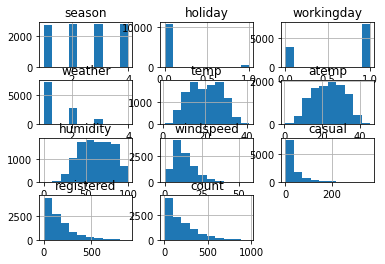

In [15]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [16]:
# create a new feature
train["year"] = train.datetime.dt.year
train["month"] = train.datetime.dt.month
train["day"] = train.datetime.dt.day
train["hour"] = train.datetime.dt.hour
test["hour"] = test.datetime.dt.hour
test["year"] = test.datetime.dt.year
test["month"] = test.datetime.dt.month
test["day"] = test.datetime.dt.day

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [17]:
train.loc[:, "weather"] = train["weather"].astype("category")
train.loc[:, "season"] = train["season"].astype("category")
test.loc[:, "weather"] = test["weather"].astype("category")
test.loc[:, "season"] = test["season"].astype("category")

In [18]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1


array([[<AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>]], dtype=object)

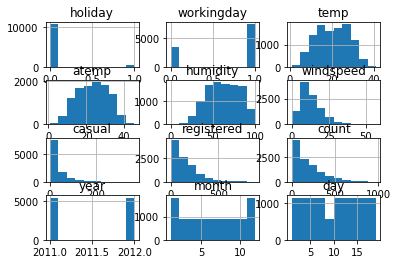

In [19]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [58]:
num_trials = 5
search_strategy = 'auto'
hyperparameters = {
    'NN': {'num_epochs': 20, 'batch_size': 32}, 
    'GBM': {'num_boost_round': 50}
}
hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_features = TabularPredictor(
        label="count", 
        problem_type="regression", 
        eval_metric="root_mean_squared_error", 
        learner_kwargs={"ignored_columns": ["casual", "registered"]}
    ).fit(
        train_data=train, time_limit=600, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

No path specified. Models will be saved in: "AutogluonModels/ag-20211130_002147/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20211130_002147/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 14
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3468.35 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeature

In [59]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetMXNet_BAG_L1/T0 -142.639496       3.046254  369.104026                3.046254         369.104026            1       True          1
1       WeightedEnsemble_L2 -142.639496       3.047012  369.107234                0.000758           0.003208            2       True          2
2  NeuralNetMXNet_BAG_L2/T0 -143.300089       6.755942  575.800725                3.709688         206.696699            2       True          3
3       WeightedEnsemble_L3 -143.300089       6.756745  575.805119                0.000803           0.004394            3       True          4
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_TabularNeuralNet', 'WeightedEnsembleModel'}
Bagging used: True  (with 10 folds)
Multi-layer stack-ensembling used: True  (with 3 levels)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'NeuralNetMXNet_BAG_L1/T0': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'NeuralNetMXNet_BAG_L2/T0': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetMXNet_BAG_L1/T0': -142.63949632894628,
  'WeightedEnsemble_L2': -142.63949632894628,
  'NeuralNetMXNet_BAG_L2/T0': -143.30008894081982,
  'WeightedEnsemble_L3': -143.30008894081982},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'NeuralNetMXNet_BAG_L1/T0': 'AutogluonModels/ag-20211130_002147/models/NeuralNetMXNet_BAG_L1/T0/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20211130_002147/models/WeightedEnsemble_L2/',
  'NeuralNetMXNet_BAG_L2/T0': 'AutogluonModels/ag-20211130_002147/models/NeuralNetMXNet_BAG_L2/T0/',
  'WeightedEnsemble_L3': 'AutogluonModels/ag-20211130_002147/models/WeightedEnsemble_L3/'},
 'model_fit_times': {'NeuralNetMXNet_BAG_L1/T0': 369.10402607917786,
  'WeightedEnsemble

In [60]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
for num, val in predictions_new_features.items():
    if val < 0:
        predictions_new_features[num] = 0


In [61]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [62]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:01<00:00, 129kB/s]
Successfully submitted to Bike Sharing Demand

In [63]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2021-11-30 00:32:23  new features                       complete  1.21904      1.21904       
submission_new_hpo.csv       2021-11-30 00:18:50  new features with hyperparameters  complete  1.22871      1.22871       
submission_new_hpo.csv       2021-11-29 23:28:04  new features with hyperparameters  complete  1.22353      1.22353       
submission_new_hpo.csv       2021-11-29 23:19:03  new features with hyperparameters  complete  1.55849      1.55849       


#### New Score of 1.46785 

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [52]:
num_trials = 5
search_strategy = 'auto'
hyperparameters = {
    'NN': {'num_epochs': 20, 'batch_size': 32}, 
    'GBM': {'num_boost_round': 50}
}
hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(
        label="count", 
        problem_type="regression", 
        eval_metric="root_mean_squared_error", 
        learner_kwargs={"ignored_columns": ["casual", "registered"]}
    ).fit(
        train_data=train, time_limit=600, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

No path specified. Models will be saved in: "AutogluonModels/ag-20211130_000739/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20211130_000739/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 14
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3503.38 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeature

In [53]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetMXNet_BAG_L1/T0 -147.316130       8.372253  364.915462                8.372253         364.915462            1       True          1
1       WeightedEnsemble_L2 -147.316130       8.374283  364.922389                0.002030           0.006927            2       True          2
2  NeuralNetMXNet_BAG_L2/T0 -149.181521      16.918825  560.224124                8.546572         195.308662            2       True          3
3       WeightedEnsemble_L3 -149.181521      16.919567  560.227685                0.000742           0.003561            3       True          4
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_TabularNeuralNet', 'WeightedEnsembleModel'}
Bagging used: True  (with 10 folds)
Multi-layer stack-ensembling used: True  (with 3 levels)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'NeuralNetMXNet_BAG_L1/T0': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'NeuralNetMXNet_BAG_L2/T0': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetMXNet_BAG_L1/T0': -147.31613018973675,
  'WeightedEnsemble_L2': -147.31613018973675,
  'NeuralNetMXNet_BAG_L2/T0': -149.18152113530493,
  'WeightedEnsemble_L3': -149.18152113530493},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'NeuralNetMXNet_BAG_L1/T0': 'AutogluonModels/ag-20211130_000739/models/NeuralNetMXNet_BAG_L1/T0/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20211130_000739/models/WeightedEnsemble_L2/',
  'NeuralNetMXNet_BAG_L2/T0': 'AutogluonModels/ag-20211130_000739/models/NeuralNetMXNet_BAG_L2/T0/',
  'WeightedEnsemble_L3': 'AutogluonModels/ag-20211130_000739/models/WeightedEnsemble_L3/'},
 'model_fit_times': {'NeuralNetMXNet_BAG_L1/T0': 364.9154622554779,
  'WeightedEnsemble_

In [54]:
# Remember to set all negative values to zero
predictions_hpo = predictor_new_hpo.predict(test)
for num, val in predictions_hpo.items():
    if val < 0:
        predictions_hpo[num] = 0

In [55]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission_new_hpo["count"] = predictions_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [56]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 195kB/s]
Successfully submitted to Bike Sharing Demand

In [57]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2021-11-30 00:18:50  new features with hyperparameters  complete  1.22871      1.22871       
submission_new_hpo.csv       2021-11-29 23:28:04  new features with hyperparameters  complete  1.22353      1.22353       
submission_new_hpo.csv       2021-11-29 23:19:03  new features with hyperparameters  complete  1.55849      1.55849       
submission_new_hpo.csv       2021-11-29 22:40:09  new features with hyperparameters  complete  1.54423      1.54423       


#### New Score of  1.22353

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

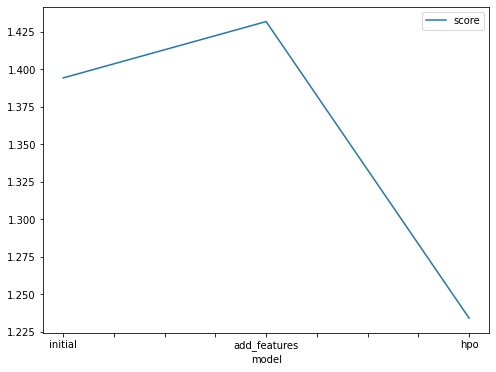

In [38]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [1.39422, 1.43178, 1.23409]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

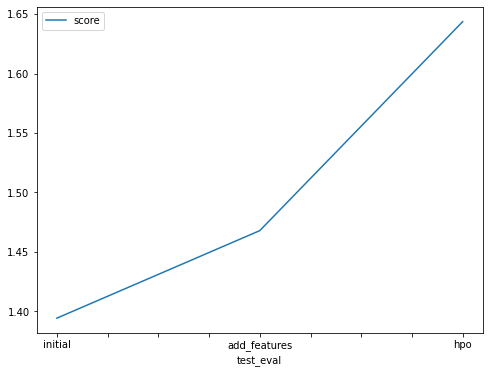

In [39]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.39422, 1.46785, 1.64363]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [20, 20, 20],
    "hpo2": [32, 32, 32],
    "hpo3": [50, 50, 50],
    "score": [1.23194, 1.21904, 1.22871]
})